# Dataset

Before we try to demonstrate positional bias, we need a good source of MCQs. We'll use the Measuring Massive Multitask Language Understanding (MMLU) (Hendrycks et al. 2021) dataset of multiple choice questions downloaded from the MMLU repository https://github.com/hendrycks/test. MMLU contains 14,042 MCQs from 57 categories.

Here, we load the Measuring Massive Multitask Language Understanding (MMLU) (Hendrycks et al. 2021) dataset of multiple choice questions downloaded from the MMLU repository https://github.com/hendrycks/test. Each question has 4 options A, B, C, and D and one correct answer. In addition, each category has 5 example questions designed for consistent, 5-shot experiments.

# Setup

In [1]:
import logging
from pathlib import Path

from matplotlib import pyplot as plt

import llm_mcq_bias as lmb

In [2]:
project_path = Path("../")
datasets_path = project_path / ".build" / "datasets"

logger = logging.getLogger(__name__)

# Load Data

We'll start by loading the unmodified MMLU dataset.

In [3]:
# Load example questions
examples = lmb.datasets.mmlu.load_dataset(datasets_path, segment="dev")

# Load test questions
questions = lmb.datasets.mmlu.load_dataset(datasets_path, segment="test")

In [4]:
questions.sample(n=5)

,question,A,B,C,D,answer,category
6035,This question refers to the following informat...,Mali was able to forge advanced bronze tools f...,International trade with Sub-Saharan Africa in...,The jizya could only be collected on unbelieve...,Mali's relatively advanced mining technologies...,B,high school world history
7133,Which type of retailer involves comparatively ...,Discount retailers.,Convenience stores.,Category killer stores.,Limited line retailers.,A,marketing
6275,About what percentage of people who have had b...,Less than 25%,Less than 50%,More than 50%,More than 75%,C,human aging
750,Phosphocreatine in the muscle cell is found in:,the mitochondria.,all subcellular compartments.,the sarcolemma.,the cytoplasm.,D,clinical knowledge
3356,This question refers to the following informat...,Sicily ceased to be an independent kingdom.,Italians liberated Rome.,Rome became the head of a French Department.,French troops abandoned Rome to fight in the F...,D,high school european history


# Answer Distribution

Our goal is to quantify a model's inherrent positional bias by measuring the difference in accuracy caused by shifting all the correct answers to a specific option. However, if the initial pool of questions is already biased, it becomes difficult to confidently estimate the model's underlying bias.

Let's take a look at the distribution of correct answers in MMLU dataset.

Text(0.5, 1.0, 'Examples')

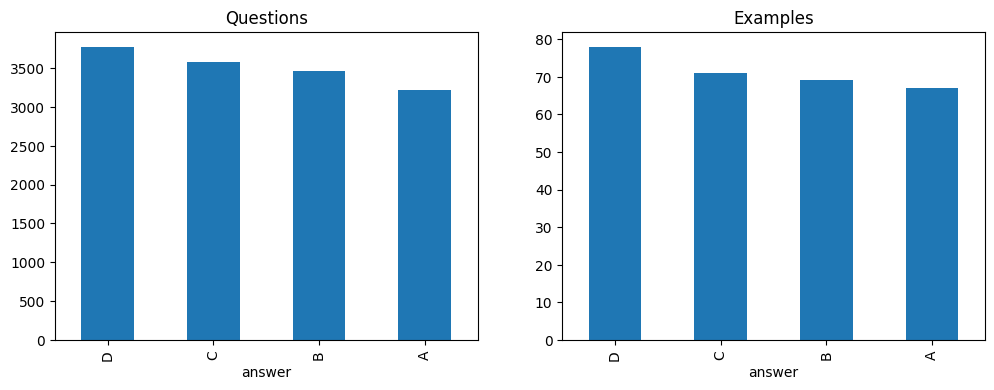

In [5]:
fig, axs = plt.subplots(ncols=2, figsize=(12, 4))

questions.answer.value_counts().plot.bar(ax=axs[0])
axs[0].set_title("Questions")

examples.answer.value_counts().plot.bar(ax=axs[1])
axs[1].set_title("Examples")

We can see a slight bias in both the test and example questions.

# Normalize Answer Distribution

To better support our positional bias experiment, we normalize the answer distribution so each option is uniformly distributed.

## Questions

In [6]:
normalized_questions = lmb.datasets.mmlu.normalize_question_answers(questions)

In [7]:
normalized_questions.head()

,question,A,B,C,D,answer,category
0,The quantum efficiency of a photon detector is...,"an average of 10 times, with an rms deviation ...","an average of 10 times, with an rms deviation ...","an average of 10 times, with an rms deviation ...",exactly 10 times,A,college physics
1,The economy is currently operating at full emp...,Falls Falls Falls Falls,Falls Falls No change Falls,No change Falls No change No change,Falls Falls No change No change,B,high school macroeconomics
2,Which of the following compounds has a 1H reso...,CH3F,CH3Cl,CH3Br,CH3I,B,college chemistry
3,"On May 10, 1955, a rancher, owner of a 300-acr...","Yes, because if all the leased land is condemn...","Yes, because the holder of an easement benefit...","No, because by discontinuing its operation of ...","No, because the holder of an easement is not e...",C,professional law
4,Where was the first British newspaper printed?,London,Oxford,Manchester,Edinburgh,B,public relations


Text(0.5, 1.0, 'Normalized Questions')

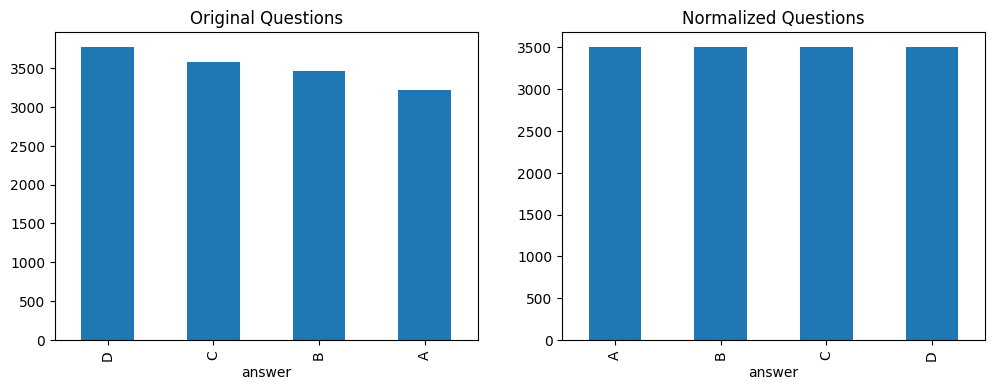

In [8]:
fig, axs = plt.subplots(ncols=2, figsize=(12, 4))

questions.answer.value_counts().plot.bar(ax=axs[0])
axs[0].set_title("Original Questions")

normalized_questions.answer.value_counts().plot.bar(ax=axs[1])
axs[1].set_title("Normalized Questions")

## Examples

Each category has 5 example questions used to generate few-shot prompts. Since we only have 4 options, we can't evenly distribute the 5 answers for each category. Since we're not trying to maximize model accuracy, we simply throw away one of the example questions and evenly distribute the remaining 4.

In [9]:
normalized_examples = lmb.datasets.mmlu.normalize_example_answers(examples)

Text(0.5, 1.0, 'Normalized Examples')

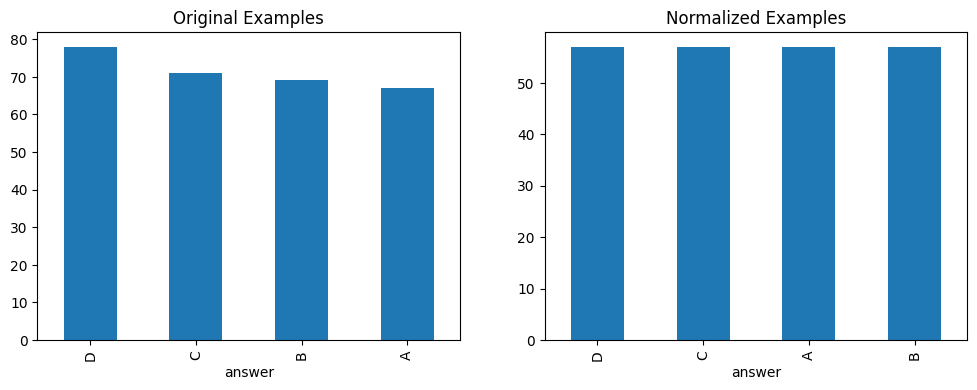

In [10]:
fig, axs = plt.subplots(ncols=2, figsize=(12, 4))

examples.answer.value_counts().plot.bar(ax=axs[0])
axs[0].set_title("Original Examples")

normalized_examples.answer.value_counts().plot.bar(ax=axs[1])
axs[1].set_title("Normalized Examples")